In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import pandas as pd
import datetime as dt

plt.style.use('_mpl-gallery')

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Assign the measurement and station classes to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create a session from Python to the database
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database, calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("A year ago: ", year_ago)

A year ago:  2016-08-23


In [9]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitations = [{"date": result[0], "precipitation": result[1]} for result in results]

# Sort the dataframe by date and drop the NaN values
precipitations_df = pd.DataFrame(precipitations).sort_values(by="date").dropna(how='any')


dates = precipitations_df.loc[:, "date"]
prcp_measures = precipitations_df.loc[:, "precipitation"]

ValueError: could not convert string to float: 'b'

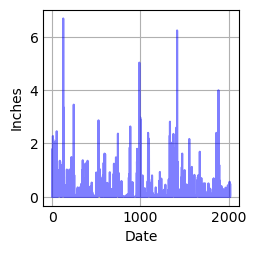

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
# Setting x axis and tick locations
fig, ax = plt.subplots()
x_axis = np.arange(len(dates))
tick_locations = [value+0.4 for value in x_axis]
ax.plot(x_axis, prcp_measures, color='blue', alpha=0.5)
ax.set(xlabel='Date', ylabel='Inches', aspect='auto', position="best")
ax.grid()

# Plot
plt.figure(figsize=(20,4))
plt.xticks(tick_locations, prcp_measures, rotation="vertical")
plt.show()

# fig, ax = plt.subplots()
# 
# # # fig.savefig("test.png")
# plt.show()

In [13]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.plot(x_axis, precipitation_df["Inches"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
plt.show()

NameError: name 'precipitation_df' is not defined

<Figure size 2000x400 with 0 Axes>

In [ ]:
# Close the session
session.close()